#### Objective of the exercise:
- How to implement K-Nearest Neighbors algorithm in python
- How to work with real dataset and evaluate KNN algorithm
- How to use KNN to make a prediction for new data

#### Dataset description
This dataset has been used to predict the flower species utilizing the measurements of the Iris
flowers. Iris is a plant with showy flowers. It takes its name from the Greek word for a rainbow, which
is also the name for the Greek goddess of the rainbow, 

The dataset contains 150 observations (rows) with 4 features (input variables) and one output
variable (label). The Iris dataset is a balanced dataset, which means that there are equal number of
instances in each class.

Figure 1 shows pairwise relationships in the given dataset.

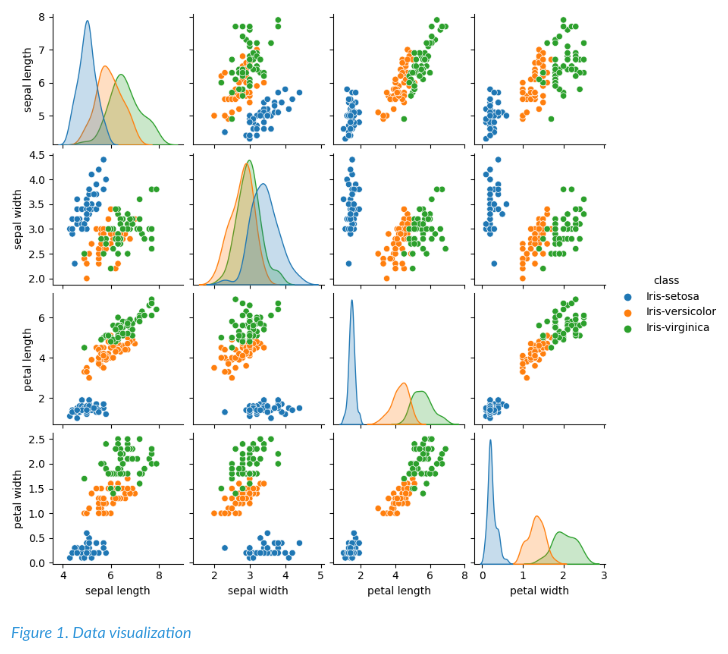

The variable names are as follow:
- Sepal length in cm.
- Sepal width in cm.
- Petal length in cm.
- Petal width in cm.
- Class
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

Install pandas in `uitai` environment using: `pip install pandas`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import math

In [ ]:
df_iris = pd.read_csv('../data/iris.csv', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

df_iris.info()
df_iris.head()

In [ ]:
pd.factorize(df_iris['class'])

#### Tasks is to implement three main functions to
1. Calculate the distance
2. Find the nearest neighbors
3. Make the predictions

#### Task 01. Calculate the distance

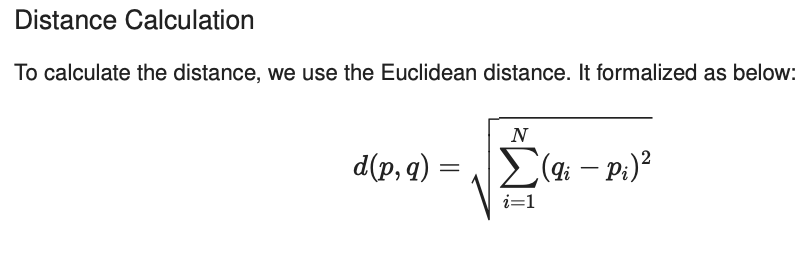

Where 'p' and 'q' are two feature vectors from our dataset. 'i' is the index of a specific feature and 'N' the number of features in the dataset.
With Euclidean distance, the smaller values represent the higher similarity between corresponding
feature vctors. The value zero indicates the absolute similarity. Fill in the code below.

In [ ]:
# calculating Euclidean distance for 2 data points
def calc_Euclidean_distance(point1, point2):
    """
    Calculates Euclidean distance for 2 points.

    Args:
        point1 (list): first data point.
        point2 (list): second data point

    Returns:
        float: The Euclidean distance between 2 points.
    """
    


### Task 02. Finding the Nearest Neighbors
To find the nearest neighbors, we need to calculate the distance between each data points in our
dataset and the new data point. We can do so by using the distance function explained above.

After calculating the distances, we sort all of the data points based on their distance to the new data
point. Then return the top K as the nominated neighbors.  Fill in the code below.

In [ ]:
def find_nearest_neighbors(training_data, labels, test_point, k):
    """ 
    Finds the nearest neighbors for a test point.

    Args:
        training_data (list): training data.
        labels (list): labels for the training data.
        test_point (list): test point
        k (int): number of nearest neighbors to find.

    Returns:
        list: list of nearest neighbors
    """
    


### Task 03. Make  predictions
The new data point's class can be determined from the most similar neighbors that we have
obtained. As we work on a classification task, our prediction will be the most represented class
among the selected neighbors.

To achieve this, we can use the function 'max()' in python (https://docs.python.org/3/library/functions.html#max). Fill in the code below.

In [ ]:
def make_prediction(neighbors):
    """
    Makes a prediction for a test point.

    Args:
        neighbors (list): list of nearest neighbors.

    Returns:
        str: The predicted class.
    """
    



#### Goal
Final goal of this exercise is to classify the data point below.

In [ ]:
new_dp = [7.0, 3.1, 1.3, 0.7]


In [ ]:
# preparing the data
X_train = df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']].values.tolist()
y_train = df_iris['class'].tolist()

# directly making prediction with k = 5 for example for new_dp
neighbors = find_nearest_neighbors(X_train, y_train, new_dp, k=5)
prediction = make_prediction(neighbors)

print(f"Prediction is: {prediction}")


### Check it on the differents plots by looking at all the features we have

In [ ]:
# let's first plot the data with features and then look at the new_dp
def plot_knn_test(X, y, test_point, k=3, feature1='sepal length', feature2='petal length'):
    """
    Plots the KNN example with the test point and its neighbors.

    Args:
        X (list): training data.
        y (list): labels for the training data.
        test_point (list): test point.
        k (int): number of nearest neighbors to find.
        feature1 (str): first feature to plot.
        feature2 (str): second feature to plot. 
    """
    plt.figure(figsize=(10, 8))
    colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
    
    # creating a mapping of feature names to indices
    feature_indices = {
        'sepal length': 0,
        'sepal width': 1,
        'petal length': 2,
        'petal width': 3
    }
    
    for species in df_iris['class'].unique():
        species_data = df_iris[df_iris['class'] == species]
        plt.scatter(species_data[feature1], species_data[feature2], 
                    c=colors[species], label=species, alpha=0.6)
    
    # we use indices to access test_point
    plt.scatter(test_point[feature_indices[feature1]], 
                test_point[feature_indices[feature2]], 
                c='black', s=200, marker='*', label='Test Point')
    
    neighbors = find_nearest_neighbors(X, y, test_point, k)
    
    # Separate scatter plot for nearest neighbors
    neighbor_points = [X[y.index(neighbor[1])] for neighbor in neighbors]
    plt.scatter([p[feature_indices[feature1]] for p in neighbor_points],
                [p[feature_indices[feature2]] for p in neighbor_points],
                c='cyan', s=100, edgecolors='black', label='Nearest Neighbours')
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'KNN example (k={k})')
    plt.legend()
    plt.show()


In [ ]:
# let's check the new_dp on the plot with 2 features at a time
plot_knn_test(X_train, y_train, new_dp, k=5, feature1='sepal length', feature2='petal length')

plot_knn_test(X_train, y_train, new_dp, k=5, feature1='sepal width', feature2='petal width')

plot_knn_test(X_train, y_train, new_dp, k=5, feature1='petal length', feature2='petal width')


### Task 04
Comment on how the classifer is working based on the plots you see with various features pairs.

### Task 05

Let's also test different k values to see how classifier results. Vary changing k from 1-20 and print the classifier results

In [ ]:
k_values_range = [x for x in range(1, 21)] # used 1-20 data points when making a prediction

# test different k values


### Task 06
Comment on the classifier stability with the choice of k. Varing k from 100-155

In [ ]:
k_values_range = [x for x in range(100, 155)] # used 100-124 data points when making a prediction

# test different k values
